### This script contains the following:
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. How well the model performed

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to call them specifically.
%matplotlib inline

In [3]:
# Create path to file

path = '/Users/schitchards/Career Foundry/Achievement 6/Data'

In [4]:
# Import dataframe
df = pd.read_csv(os.path.join(path,'Prepared Data','df6_2.csv'))

### 2. Data cleaning

In [5]:
df.head()

Column1  Unnamed: 0  Order Date  Row ID    Order ID       Ship Mode  \
0        0           0  2020-01-01     849  2017107503  Standard Class   
1        1           1  2020-01-01    4010  2017144463  Standard Class   
2        2           2  2020-01-01    6683  2017154466     First Class   
3        3           3  2020-01-01    8070  2017151750  Standard Class   
4        4           4  2020-01-01    8071  2017151750  Standard Class   

   Customer ID      Segment        Country         City  ...  \
0        14725     Consumer  United States       Lorain  ...   
1        20725     Consumer  United States  Los Angeles  ...   
2        13390  Home Office  United States     Franklin  ...   
3        15250     Consumer  United States   Huntsville  ...   
4        15250     Consumer  United States   Huntsville  ...   

                                        Product Name    Sales Quantity  \
0                 Linden 10" Round Wall Clock, Black   48.896        4   
1  Howard Miller 11-1/2" Diameter Brentwood Wall ...  474.430       11   
2            Wilson Jones Easy Flow II Sheet Lifters    3.600        2   
3                      SAFCO Boltless Steel Shelving  454.560        5   
4  Tenex Carpeted, Granite-Look or Clear Contempo...  141.420        5   

  Discount    Profit     Price Break Even Price  Month  Price category  \
0      0.2    8.5568   14.6688          10.0848      1       Low price   
1      0.0  199.2606   43.1300          25.0154      1       Low price   
2      0.0    1.7280    1.8000           0.9360      1       Low price   
3      0.2 -107.9580  109.0944         112.5036      1    Middle price   
4      0.6 -187.3815   45.2544          65.7603      1       Low price   

   Profit Category  
0           Profit  
1           Profit  
2           Profit  
3             Loss  
4             Loss  

[5 rows x 26 columns]

In [6]:
df.columns

Index(['Column1', 'Unnamed: 0', 'Order Date', 'Row ID', 'Order ID',
       'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Price',
       'Break Even Price', 'Month', 'Price category', 'Profit Category'],
      dtype='object')

In [7]:
# Remove unwanted columns
df=df.drop(columns=['Column1','Unnamed: 0'])

In [8]:
df.shape

(3312, 24)

##### Missing values

In [9]:
# Check for missing values
df.isnull().sum()
# No missing values to handle

Order Date          0
Row ID              0
Order ID            0
Ship Mode           0
Customer ID         0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Price               0
Break Even Price    0
Month               0
Price category      0
Profit Category     0
dtype: int64

##### Duplicates check

In [11]:
dups = df.duplicated()
dups.shape

(3312,)

### 3. Data prep for regression analysis

##### Extreme values checks

/Users/schitchards/opt/anaconda3/envs/career/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

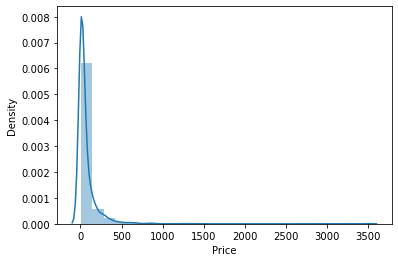

In [12]:
sns.distplot(df['Price'], bins=25) # Shows extreme values

In [13]:
# Some of the outliers in the high values may need to be removed, but I will try without doing so because we have no reason to believe that these are not accurate prices for items.

In [14]:
df.describe()

Row ID      Order ID   Customer ID   Postal Code         Sales  \
count  3312.000000  3.312000e+03   3312.000000   3312.000000   3312.000000   
mean   5087.107488  2.017134e+09  15911.788949  56186.515097    221.381418   
std    2817.482266  2.044602e+04   3428.603128  31980.375516    585.257531   
min      13.000000  2.017100e+09  10030.000000   1841.000000      0.444000   
25%    2655.750000  2.017117e+09  12940.000000  27978.750000     17.018000   
50%    5183.500000  2.017133e+09  15835.000000  60472.500000     53.810000   
75%    7498.250000  2.017152e+09  18853.750000  90032.000000    205.105700   
max    9994.000000  2.017170e+09  21925.000000  99301.000000  13999.960000   

          Quantity     Discount       Profit        Price  Break Even Price  \
count  3312.000000  3312.000000  3312.000000  3312.000000       3312.000000   
mean      3.766908     0.156467    28.212340    68.612545         52.485566   
std       2.221776     0.207429   241.864342   171.125353        124.286766   
min       1.000000     0.000000 -3839.990400     0.604800          0.544500   
25%       2.000000     0.000000     1.763200     6.220800          3.473600   
50%       3.000000     0.200000     8.296800    18.211200         12.860400   
75%       5.000000     0.200000    28.315125    68.515200         53.235000   
max      14.000000     0.800000  6719.980800  3499.990000       2959.992600   

             Month  
count  3312.000000  
mean      7.730978  
std       3.341226  
min       1.000000  
25%       5.000000  
50%       9.000000  
75%      11.000000  
max      12.000000

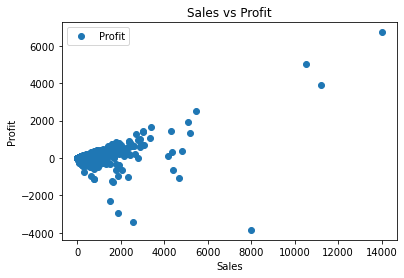

In [68]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Sales', y='Profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

In [35]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Sales'].values.reshape(-1,1)
y = df['Profit'].values.reshape(-1,1)

In [36]:
X

array([[ 48.896],
       [474.43 ],
       [  3.6  ],
       ...,
       [ 13.904],
       [ 20.72 ],
       [  3.024]])

In [37]:
y

array([[  8.5568],
       [199.2606],
       [  1.728 ],
       ...,
       [  4.5188],
       [  6.475 ],
       [ -0.6048]])

In [38]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis
#### Sales vs Profits

In [39]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [40]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

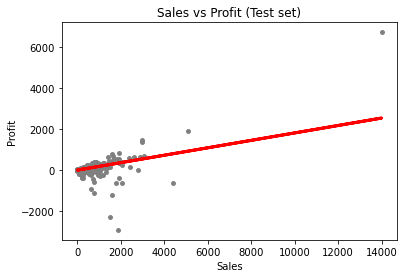

In [53]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

The red regression line indicates that as the value of sales (independant variable) increases, the mean of profit (dependant variable) increases. The line doesn't perfectly cover all data points so while sales is an important factor in profit formation, it's not the only one.

In [43]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [44]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.18159289]]
Mean squared error:  53276.84984566041
R2 score:  0.35156366310651166


    Slope - A positive value indicates a positive relationship, as X rises y slightly increases at a degree of 0.18159...
    MSE - The MSE of 53276 means that the regression line passes far away from the data points, indicating that the regression isn't an accurate representation of the data.
    R2 Score - The value of 0.35 is close to zero so it indicates a poor fit.


In [45]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual   Predicted
0    -53.7432    3.657323
1     14.4495    5.862587
2     47.0979    9.605216
3      5.6112   -7.373356
4     13.7808   -3.381218
5      2.8296   -8.381559
6      3.6288   -8.401898
7      7.9200   -5.682363
8     37.5624    4.228251
9  -1141.4700  127.903902
10    77.7519   42.008651
11     3.5022   -8.327808
12   -13.9380   -6.983294
13    -3.5508   -9.405380
14  -384.7164   29.259740
15     9.3125   -4.873185
16    30.6054   39.117329
17   -71.8116  120.120104
18  -158.1020  112.759055
19    -2.1195   -8.231927
20    84.5982  126.270292
21    81.9210   21.366987
22     2.5896   -8.837721
23     9.2322   -6.640084
24     9.8856   -5.298112
25    16.9450    2.023713
26     1.7739   -9.091587
27     0.1533   -9.966502
28    50.3960   81.230898
29    15.7872   -2.933773

##### Compare how the regression fits the training set

In [46]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [47]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.18159289]]
Mean squared error:  37760.70202887088
R2 score:  0.21860470678314292


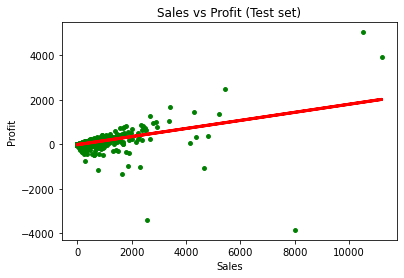

In [54]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

### 5. How well the model performed

Its clear that the model isn't performing well. Comparing the actual values to the predicted values shows quite a difference. This along with the results of the summary statistics shows that the model isn't doing a good job of explaining the relationship between the total "Sales" of an order and "Profits" variables.

I can rule out the hypothesis "Profits increase as Sales increase", this statement is only partially true and theres still a lot of variance in the data that can't be explained by the linear relationship between the two variables.